# Lab | Customer Analysis Final Round

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

01 - Problem (case study)

    Data Description.
    Goal.

02 - Getting Data

    Read the .csv file.

03 - Cleaning / Wrangling / Exploratory Data Analysis (EDA)

    Change header names.
    Deal with NaN values.
    Categorical Features.
    Numerical Features.
    Exploration.

04 - Processing Data

    Dealing with outliers.
    Normalization (for numerical).
    Encoding Categorical Data (for categorical).
    X-y-split.
    Concat DataFrames.
    Train-test-split.

05 - Modeling

    Apply model (linear regression).

06 - Model Validation

    R2.
    MSE.
    RMSE.
    MAE.

07 - Changing Parameters to improve the model

08 - Reporting

    Present results.


## 01 - Problem (case study)

Data Description& Goal:

    The objective of this data is to understand customer demographics and buying behavior. 
    Later, we will use predictive analytics to analyze the most profitable customers and how they interact. 
    After that, we will take targeted actions to increase profitable customer response, retention, and growth.

## 02 - Getting Data

Read the .csv file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

import math
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew
from scipy.stats import kurtosis

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the .csv file
data = pd.read_csv(r"C:/Users/josefin/01_IRONHACK/Week1/Day1.4/lab-customer-analysis-round-6/files_for_lab/csv_files/marketing_customer_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 03 - Cleaning / Wrangling / Exploratory Data Analysis (EDA)

    Change header names.
    Deal with NaN values.
    Categorical Features.
    Numerical Features.
    Exploration.

In [3]:
#Show the dataframe shape.
data.shape

(9134, 24)

In [4]:
#Show all columns.
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
#Rename all incorrect columns.
data = data.rename(columns={'EmploymentStatus':'Employment Status'})

In [6]:
#Standardize header names.
data.columns = data.columns.astype("str")
data.columns = data.columns.str.upper()

In [7]:
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENT STATUS,GENDER,INCOME,LOCATION CODE,MARITAL STATUS,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
#Show the datatypes of all columns.
data.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENT STATUS                 object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM            int64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS          int64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE                      object
dtype: object

In [9]:
#Change 'EFFECTIVE TO DATE' from object to Datetime format.
data['EFFECTIVE TO DATE'] = pd.to_datetime(data['EFFECTIVE TO DATE'], errors='coerce')
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENT STATUS,GENDER,INCOME,LOCATION CODE,MARITAL STATUS,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
#Show numerical columns.
data.select_dtypes(np.number)

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
#Show categorical columns.
data.select_dtypes(np.object)

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT STATUS,GENDER,LOCATION CODE,MARITAL STATUS,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
data.shape

(9134, 24)

In [13]:
#Drop duplicates (if there are any).
data = data.drop_duplicates()

In [14]:
data.shape

(9134, 24)

In [15]:
#Check and deal with NaN values.
data.isna().sum()

#As shown in the table there are no NaN values!

CUSTOMER                         0
STATE                            0
CUSTOMER LIFETIME VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE TO DATE                0
EMPLOYMENT STATUS                0
GENDER                           0
INCOME                           0
LOCATION CODE                    0
MARITAL STATUS                   0
MONTHLY PREMIUM AUTO             0
MONTHS SINCE LAST CLAIM          0
MONTHS SINCE POLICY INCEPTION    0
NUMBER OF OPEN COMPLAINTS        0
NUMBER OF POLICIES               0
POLICY TYPE                      0
POLICY                           0
RENEW OFFER TYPE                 0
SALES CHANNEL                    0
TOTAL CLAIM AMOUNT               0
VEHICLE CLASS                    0
VEHICLE SIZE                     0
dtype: int64

In [16]:
#Check unique values for each column.

for i in data.columns.tolist():         
    print(i, len(data[i].unique()))

CUSTOMER 9134
STATE 5
CUSTOMER LIFETIME VALUE 8041
RESPONSE 2
COVERAGE 3
EDUCATION 5
EFFECTIVE TO DATE 59
EMPLOYMENT STATUS 5
GENDER 2
INCOME 5694
LOCATION CODE 3
MARITAL STATUS 3
MONTHLY PREMIUM AUTO 202
MONTHS SINCE LAST CLAIM 36
MONTHS SINCE POLICY INCEPTION 100
NUMBER OF OPEN COMPLAINTS 6
NUMBER OF POLICIES 9
POLICY TYPE 3
POLICY 9
RENEW OFFER TYPE 4
SALES CHANNEL 4
TOTAL CLAIM AMOUNT 5106
VEHICLE CLASS 6
VEHICLE SIZE 3


In [17]:
#Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9134 non-null   object        
 1   STATE                          9134 non-null   object        
 2   CUSTOMER LIFETIME VALUE        9134 non-null   float64       
 3   RESPONSE                       9134 non-null   object        
 4   COVERAGE                       9134 non-null   object        
 5   EDUCATION                      9134 non-null   object        
 6   EFFECTIVE TO DATE              9134 non-null   datetime64[ns]
 7   EMPLOYMENT STATUS              9134 non-null   object        
 8   GENDER                         9134 non-null   object        
 9   INCOME                         9134 non-null   int64         
 10  LOCATION CODE                  9134 non-null   object        
 11  MARITAL STATUS   

In [18]:
#Describe DataFrame; show basic statistical details.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER LIFETIME VALUE,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
INCOME,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
MONTHLY PREMIUM AUTO,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
MONTHS SINCE LAST CLAIM,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
MONTHS SINCE POLICY INCEPTION,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
NUMBER OF OPEN COMPLAINTS,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
NUMBER OF POLICIES,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
TOTAL CLAIM AMOUNT,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [19]:
#Show description for only datatype object.
data.describe(include=[np.object]).T

,count,unique,top,freq
CUSTOMER,9134,9134,WM19967,1
STATE,9134,5,California,3150
RESPONSE,9134,2,No,7826
COVERAGE,9134,3,Basic,5568
EDUCATION,9134,5,Bachelor,2748
EMPLOYMENT STATUS,9134,5,Employed,5698
GENDER,9134,2,F,4658
LOCATION CODE,9134,3,Suburban,5779
MARITAL STATUS,9134,3,Married,5298
POLICY TYPE,9134,3,Personal Auto,6788


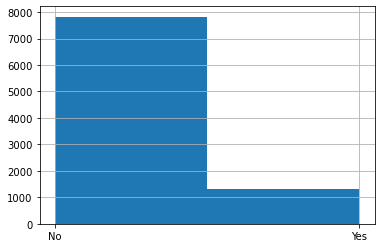

In [20]:
#Show a plot of the total number of responses.
data['RESPONSE'].hist(bins=2)
plt.show()

In [21]:
#Show a plot of the response rate by the sales channel (both categorical).

crosstab1 = pd.crosstab(data['SALES CHANNEL'], data['RESPONSE'])
crosstab1

RESPONSE,No,Yes
SALES CHANNEL,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [22]:
data['SALES CHANNEL'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: SALES CHANNEL, dtype: int64

<AxesSubplot:xlabel='RESPONSE', ylabel='count'>

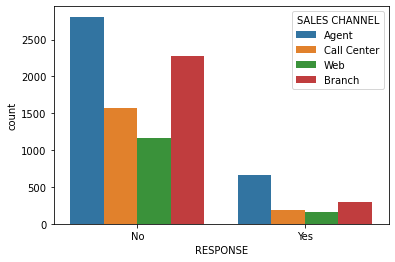

In [23]:
sns.countplot(x = "RESPONSE", hue = "SALES CHANNEL", data=data)

In [24]:
#Further plots of response rate in relation with other variables...
crosstab1 = pd.crosstab(data['GENDER'], data['RESPONSE'])
crosstab1

RESPONSE,No,Yes
GENDER,,
F,3998,660
M,3828,648


In [25]:
crosstab1 = pd.crosstab(data['EMPLOYMENT STATUS'], data['RESPONSE'])
crosstab1

RESPONSE,No,Yes
EMPLOYMENT STATUS,,
Disabled,333,72
Employed,4942,756
Medical Leave,354,78
Retired,78,204
Unemployed,2119,198


In [26]:
crosstab1 = pd.crosstab(data['LOCATION CODE'], data['RESPONSE'])
crosstab1

RESPONSE,No,Yes
LOCATION CODE,,
Rural,1611,162
Suburban,4771,1008
Urban,1444,138


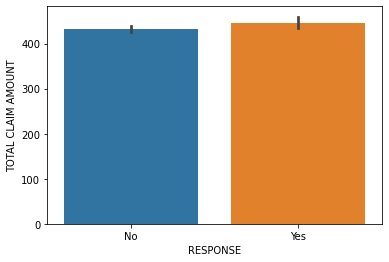

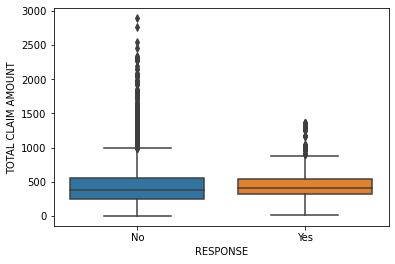

In [27]:
#Show a plot of the response rate by the total claim amount.
#Response is categorical. Total Claim Amount is numerical (float).

sns.barplot(x = 'RESPONSE', y = 'TOTAL CLAIM AMOUNT', data = data)
plt.show()

sns.boxplot(x = 'RESPONSE', y = 'TOTAL CLAIM AMOUNT', data = data)
plt.show()

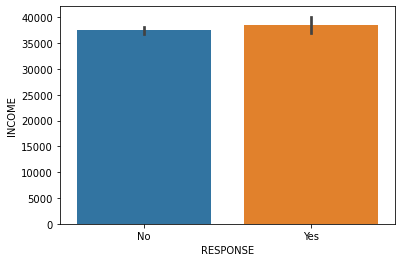

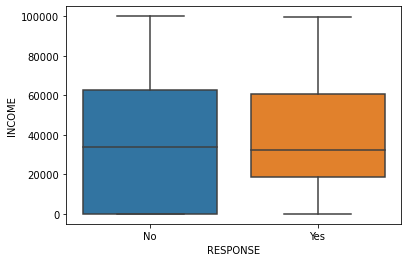

In [28]:
#Show a plot of the response rate by income.
#Response is categorical. Income is numerical (integer).

sns.barplot(x = 'RESPONSE', y = 'INCOME', data = data)
plt.show()

sns.boxplot(x = 'RESPONSE', y = 'INCOME', data = data)
plt.show()

In [29]:
#Check the data types of the columns.
data.dtypes

CUSTOMER                                 object
STATE                                    object
CUSTOMER LIFETIME VALUE                 float64
RESPONSE                                 object
COVERAGE                                 object
EDUCATION                                object
EFFECTIVE TO DATE                datetime64[ns]
EMPLOYMENT STATUS                        object
GENDER                                   object
INCOME                                    int64
LOCATION CODE                            object
MARITAL STATUS                           object
MONTHLY PREMIUM AUTO                      int64
MONTHS SINCE LAST CLAIM                   int64
MONTHS SINCE POLICY INCEPTION             int64
NUMBER OF OPEN COMPLAINTS                 int64
NUMBER OF POLICIES                        int64
POLICY TYPE                              object
POLICY                                   object
RENEW OFFER TYPE                         object
SALES CHANNEL                           

In [30]:
#Get the numeric data into dataframe called numerical.
numerical = data.select_dtypes(np.number)
numerical.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [31]:
#Get categorical columns in a dataframe called categorical.
categorical = data.select_dtypes(np.object)
categorical.head()

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT STATUS,GENDER,LOCATION CODE,MARITAL STATUS,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
#Show values for all categorical columns.

for i in categorical:
    print('Catagory: ', i)
    print(categorical[i].value_counts())
    print('\n')

Catagory:  CUSTOMER
WM19967    1
LY73893    1
LD26428    1
BK85520    1
UF44021    1
          ..
SS63511    1
CK35310    1
GJ63345    1
LA80525    1
EK40672    1
Name: CUSTOMER, Length: 9134, dtype: int64


Catagory:  STATE
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64


Catagory:  RESPONSE
No     7826
Yes    1308
Name: RESPONSE, dtype: int64


Catagory:  COVERAGE
Basic       5568
Extended    2742
Premium      824
Name: COVERAGE, dtype: int64


Catagory:  EDUCATION
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: EDUCATION, dtype: int64


Catagory:  EMPLOYMENT STATUS
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EMPLOYMENT STATUS, dtype: int64


Catagory:  GENDER
F    4658
M    4476
Name: GENDER, dtype: int64


Catagory:  LOCATION CODE
Suburb

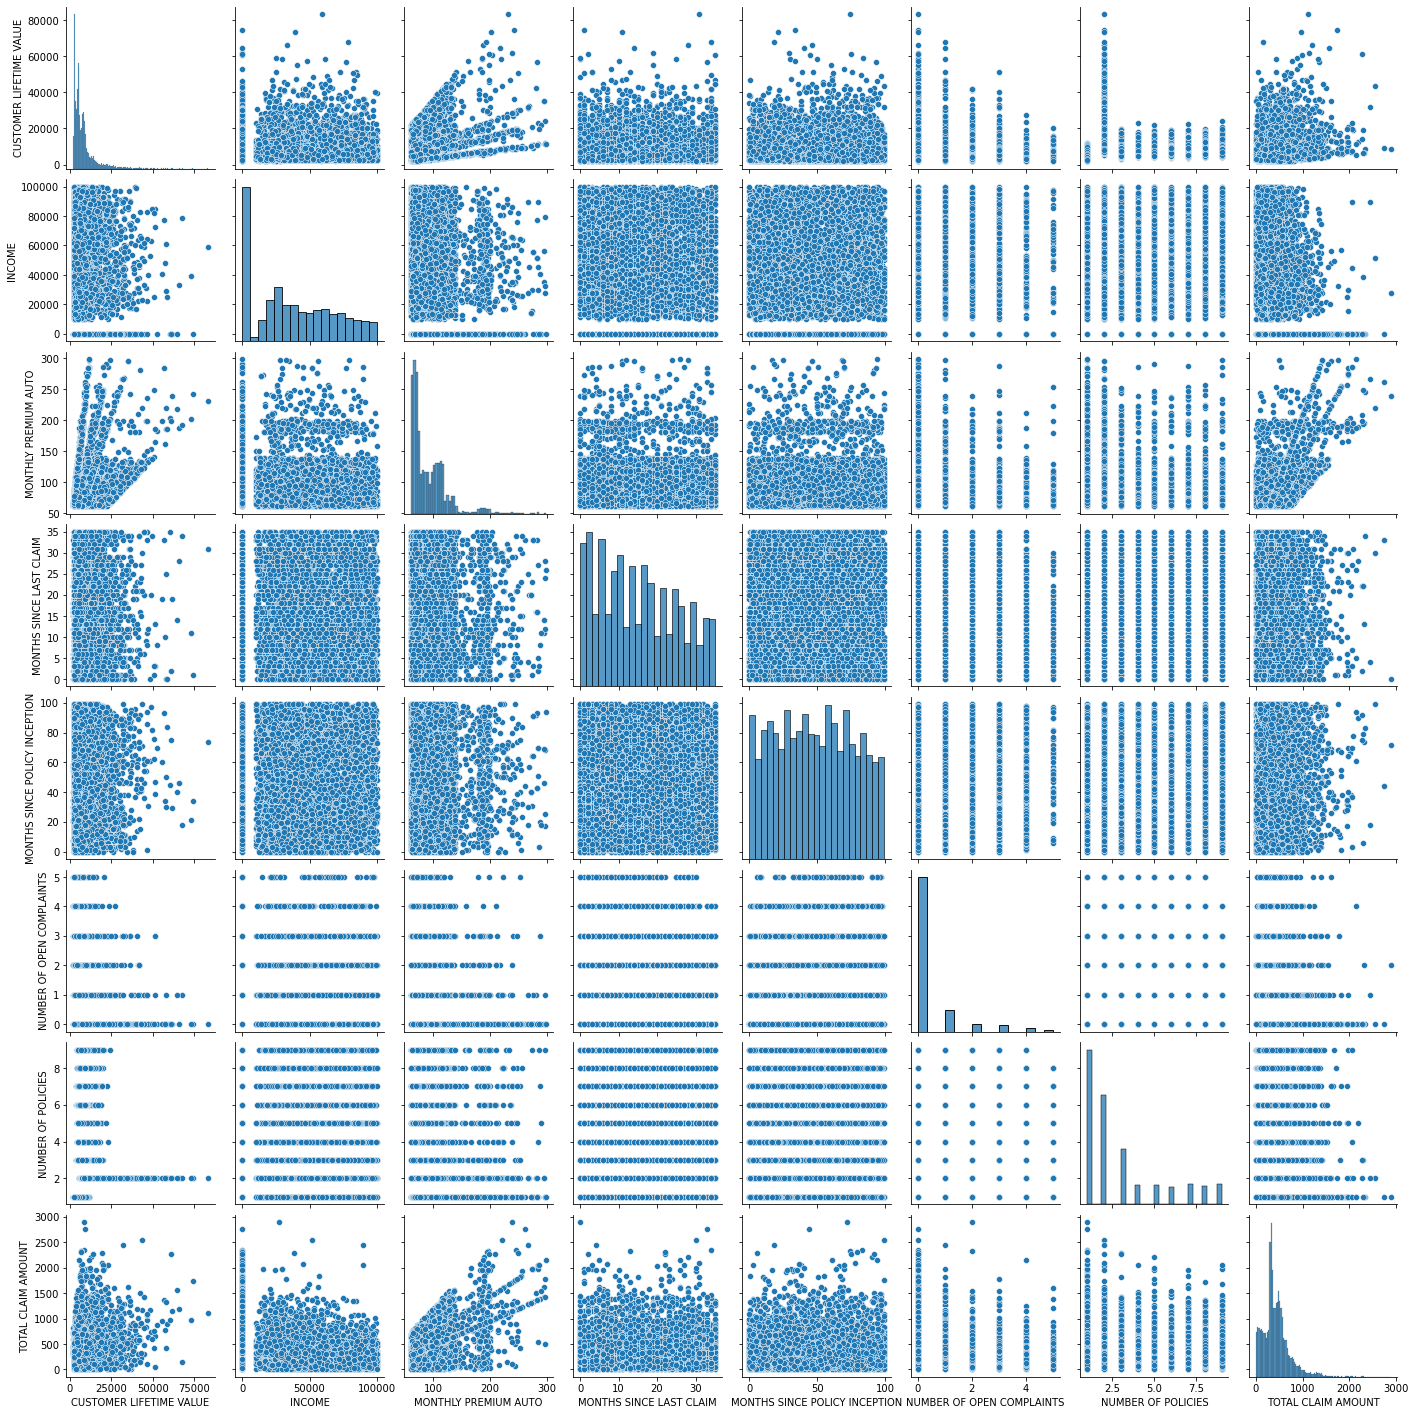

In [33]:
#Use seaborn library to construct distribution plots for the numerical variables.
sns.pairplot(numerical)

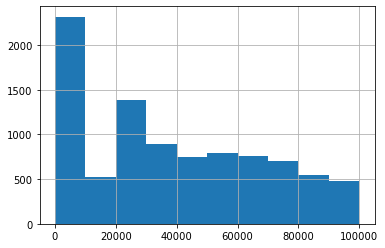

In [34]:
#Use Matplotlib to construct histograms.
#Example: Income

numerical["INCOME"].hist()
plt.show()

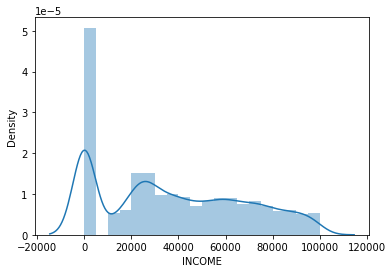

In [35]:
#Do the distributions for different numerical variables and look for a normal distribution.
#Example: Income

sns.distplot(data["INCOME"], bins = 20)
plt.show()

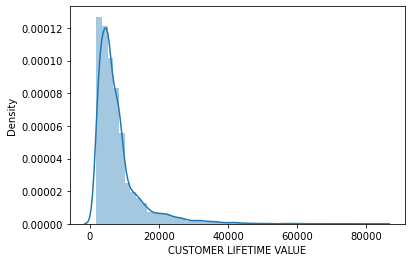

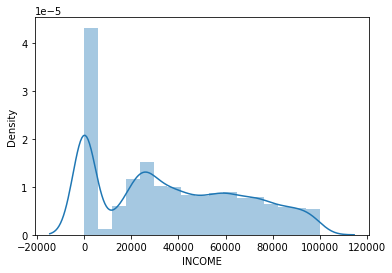

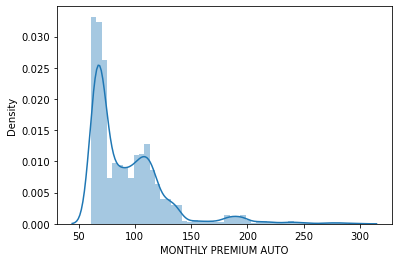

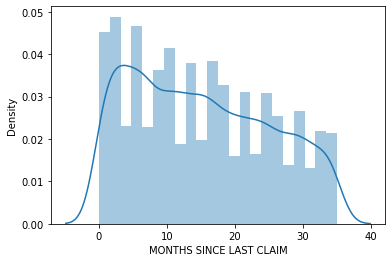

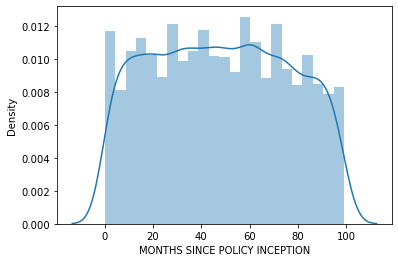

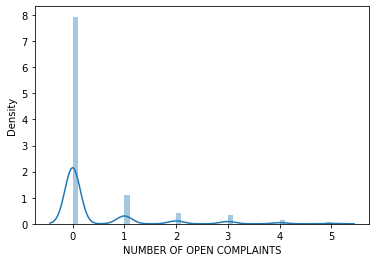

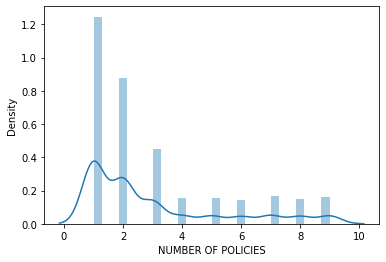

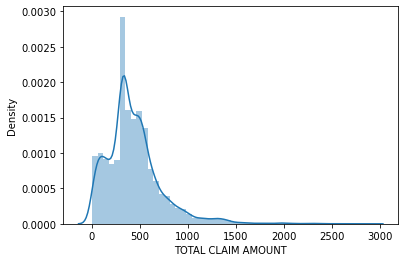

In [36]:
#distribution plots for all numerical vaiables:

for i in range(8):
    sns.distplot(numerical.iloc[:,i])
    plt.show()
    
#No normal distribution found!
# Notice: 0 INCOME really high. >>> Try replacing it by mean or median later.

In [37]:
#Show correlation between numerical columns in a table.
numerical.corr()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT
CUSTOMER LIFETIME VALUE,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
INCOME,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
MONTHLY PREMIUM AUTO,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
MONTHS SINCE LAST CLAIM,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
MONTHS SINCE POLICY INCEPTION,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
NUMBER OF OPEN COMPLAINTS,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
NUMBER OF POLICIES,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
TOTAL CLAIM AMOUNT,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


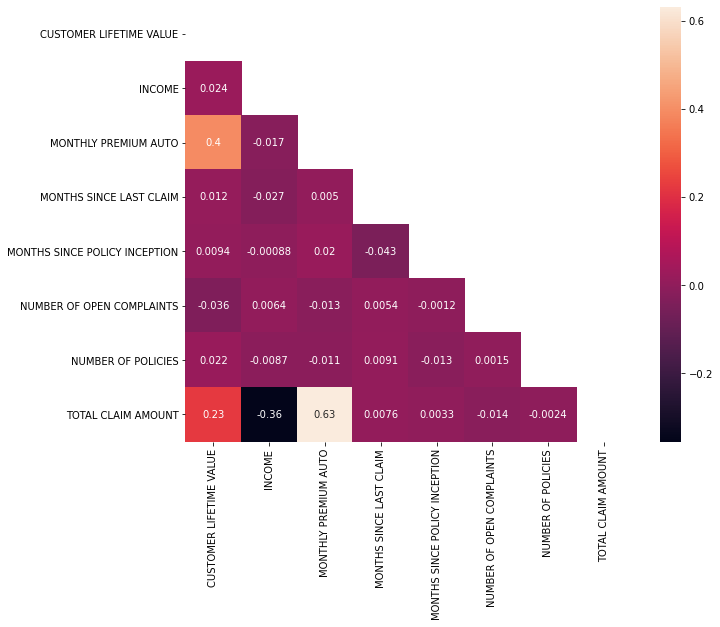

In [38]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column TOTAL CLAIM AMOUNT later as the target variable.

#HEATMAP (half correlation matrix; Pearson):

corr_data_P = data.corr()
mask = np.triu(np.ones_like(corr_data_P, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_data_P, mask=mask, annot=True)
plt.show()

#The highest correlation is 0.63 TOTAL CLAIM AMOUNT with MONTHLY PREMIUM AUTO.

#The data that is almost not correlated to TOTAL CLAIM AMOUNT is:
    #MONTHS SINCE LAST CLAIM and
    #MONTHS SINCE POLICY INCEPTION
# >>> Try dropping those later!


#CUSTOMER LIFETIME VALUE seems highly correlated to MONTHLY PREMIUM AUTO:
# >>> Try dropping CUSTOMER LIFETIME VALUE later!

In [39]:
#Cleaning original dataset by dropping unnecessary data that does not contribute to the model, e.g. CUSTOMER and EFFECTIVE TO DATE.
data = data.drop(['CUSTOMER', 'EFFECTIVE TO DATE'], axis = 1)

## 04 - Processing Data

    Dealing with outliers.
    Normalization (for numerical).
    Encoding Categorical Data (for categorical).
    X-y-split.
    Concat DataFrames.
    Train-test-split.

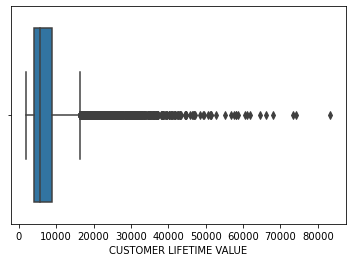

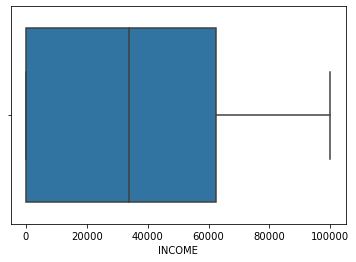

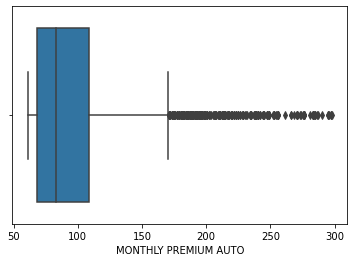

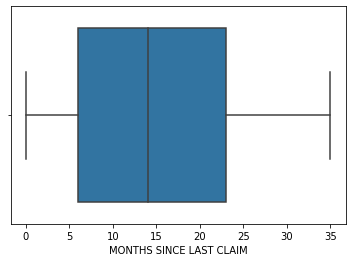

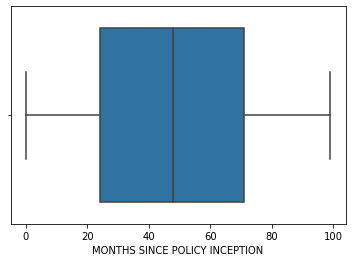

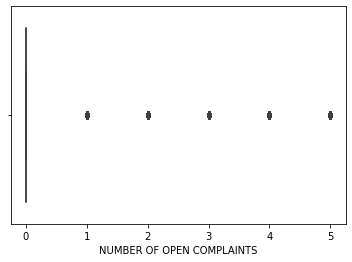

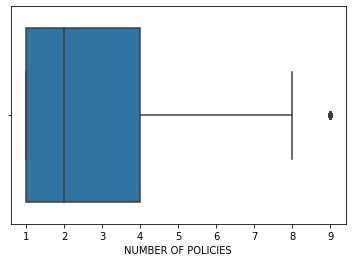

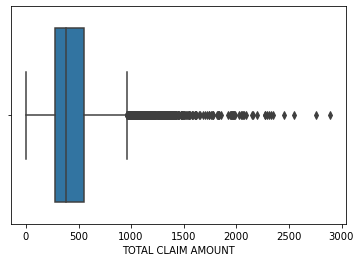

In [40]:
#Checking (numerical) outliers in a boxplot.
for i in range(8):
    sns.boxplot(numerical.iloc[:,i])
    plt.show()

In [41]:
#Calculating the quantity of (numerical) outliers.

def calculate_outliers(data):

    #list with all column names
    cols = data.columns
    for i in range(len(cols)):
        q1 = np.quantile(data[cols[i]],0.25)
        q3 = np.quantile(data[cols[i]],0.75)
        upper = q3+1.5*(q3 - q1)
        lower = q1-1.5*(q3 - q1)
        out_index = data[(data[cols[i]] < lower) | (data[cols[i]] > upper)].index
        print("Number of outliers for", cols[i],':', len(out_index))
    return

calculate_outliers(numerical)

#Number of outliers is pretty high for some, so not dropping anything at this point. Might later to improve the model.

Number of outliers for CUSTOMER LIFETIME VALUE : 817
Number of outliers for INCOME : 0
Number of outliers for MONTHLY PREMIUM AUTO : 430
Number of outliers for MONTHS SINCE LAST CLAIM : 0
Number of outliers for MONTHS SINCE POLICY INCEPTION : 0
Number of outliers for NUMBER OF OPEN COMPLAINTS : 1882
Number of outliers for NUMBER OF POLICIES : 416
Number of outliers for TOTAL CLAIM AMOUNT : 453


In [42]:
#X-Y-split
#y = target ("TOTAL CLAIM AMOUNT")
#X = other variables (apart from target and possibly other not nessecary variables)

Y = data['TOTAL CLAIM AMOUNT']
X = data.drop(['TOTAL CLAIM AMOUNT'], axis=1)

In [43]:
X.head()

,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT STATUS,GENDER,INCOME,LOCATION CODE,MARITAL STATUS,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,VEHICLE SIZE
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [44]:
Y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: TOTAL CLAIM AMOUNT, dtype: float64

In [45]:
#Split X in numerical and categorical.
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(np.object)

In [46]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUSTOMER LIFETIME VALUE        9134 non-null   float64
 1   INCOME                         9134 non-null   int64  
 2   MONTHLY PREMIUM AUTO           9134 non-null   int64  
 3   MONTHS SINCE LAST CLAIM        9134 non-null   int64  
 4   MONTHS SINCE POLICY INCEPTION  9134 non-null   int64  
 5   NUMBER OF OPEN COMPLAINTS      9134 non-null   int64  
 6   NUMBER OF POLICIES             9134 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 890.9 KB


In [47]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STATE              9134 non-null   object
 1   RESPONSE           9134 non-null   object
 2   COVERAGE           9134 non-null   object
 3   EDUCATION          9134 non-null   object
 4   EMPLOYMENT STATUS  9134 non-null   object
 5   GENDER             9134 non-null   object
 6   LOCATION CODE      9134 non-null   object
 7   MARITAL STATUS     9134 non-null   object
 8   POLICY TYPE        9134 non-null   object
 9   POLICY             9134 non-null   object
 10  RENEW OFFER TYPE   9134 non-null   object
 11  SALES CHANNEL      9134 non-null   object
 12  VEHICLE CLASS      9134 non-null   object
 13  VEHICLE SIZE       9134 non-null   object
dtypes: object(14)
memory usage: 1.4+ MB


In [48]:
#Normalize numerical data. In addition to the next step nessecary?
#X_num.apply(skew)

In [49]:
transformer = Normalizer().fit(X_num)
x_num_normalized = pd.DataFrame(transformer.transform(X_num))
print(x_num_normalized.shape)

(9134, 7)


In [50]:
x_num_normalized.columns = X_num.columns
x_num_normalized.columns

Index(['CUSTOMER LIFETIME VALUE', 'INCOME', 'MONTHLY PREMIUM AUTO',
       'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION',
       'NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES'],
      dtype='object')

In [51]:
#QUESTION: Is subdevision of "categorical" in "nominal" and "ordinal"(for COVERAGE,EDUCATION and VEHICLE SIZE) nessecary?

#Assigning ranked numbers to ordinals.

#coverage_ord = {'Basic':0,'Extended':1,'Premium':2}
#X_cat['COVERAGE'] = X_cat['COVERAGE'].map(coverage_ord)

#education_ord = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
#X_cat['EDUCATION'] = X_cat['EDUCATION'].map(education_ord)

#vehicle_ord = {'Small':0,'Medsize':1,'Large':2 }
#X_cat['VEHICLE SIZE'] = X_cat['VEHICLE SIZE'].map(vehicle_ord)

In [52]:
#Dummyfy categorical data.

x_cat_dummy = pd.get_dummies(X_cat)
x_cat_dummy.head()

,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RESPONSE_No,RESPONSE_Yes,COVERAGE_Basic,COVERAGE_Extended,COVERAGE_Premium,EDUCATION_Bachelor,EDUCATION_College,EDUCATION_Doctor,EDUCATION_High School or Below,EDUCATION_Master,EMPLOYMENT STATUS_Disabled,EMPLOYMENT STATUS_Employed,EMPLOYMENT STATUS_Medical Leave,EMPLOYMENT STATUS_Retired,EMPLOYMENT STATUS_Unemployed,GENDER_F,GENDER_M,LOCATION CODE_Rural,LOCATION CODE_Suburban,LOCATION CODE_Urban,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,POLICY TYPE_Corporate Auto,POLICY TYPE_Personal Auto,POLICY TYPE_Special Auto,POLICY_Corporate L1,POLICY_Corporate L2,POLICY_Corporate L3,POLICY_Personal L1,POLICY_Personal L2,POLICY_Personal L3,POLICY_Special L1,POLICY_Special L2,POLICY_Special L3,RENEW OFFER TYPE_Offer1,RENEW OFFER TYPE_Offer2,RENEW OFFER TYPE_Offer3,RENEW OFFER TYPE_Offer4,SALES CHANNEL_Agent,SALES CHANNEL_Branch,SALES CHANNEL_Call Center,SALES CHANNEL_Web,VEHICLE CLASS_Four-Door Car,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Large,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [53]:
concat_X = pd.concat([x_num_normalized, x_cat_dummy], axis = 1)
concat_X.head()

,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,STATE_Washington,RESPONSE_No,RESPONSE_Yes,COVERAGE_Basic,COVERAGE_Extended,COVERAGE_Premium,EDUCATION_Bachelor,EDUCATION_College,EDUCATION_Doctor,EDUCATION_High School or Below,EDUCATION_Master,EMPLOYMENT STATUS_Disabled,EMPLOYMENT STATUS_Employed,EMPLOYMENT STATUS_Medical Leave,EMPLOYMENT STATUS_Retired,EMPLOYMENT STATUS_Unemployed,GENDER_F,GENDER_M,LOCATION CODE_Rural,LOCATION CODE_Suburban,LOCATION CODE_Urban,MARITAL STATUS_Divorced,MARITAL STATUS_Married,MARITAL STATUS_Single,POLICY TYPE_Corporate Auto,POLICY TYPE_Personal Auto,POLICY TYPE_Special Auto,POLICY_Corporate L1,POLICY_Corporate L2,POLICY_Corporate L3,POLICY_Personal L1,POLICY_Personal L2,POLICY_Personal L3,POLICY_Special L1,POLICY_Special L2,POLICY_Special L3,RENEW OFFER TYPE_Offer1,RENEW OFFER TYPE_Offer2,RENEW OFFER TYPE_Offer3,RENEW OFFER TYPE_Offer4,SALES CHANNEL_Agent,SALES CHANNEL_Branch,SALES CHANNEL_Call Center,SALES CHANNEL_Web,VEHICLE CLASS_Four-Door Car,VEHICLE CLASS_Luxury Car,VEHICLE CLASS_Luxury SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports Car,VEHICLE CLASS_Two-Door Car,VEHICLE SIZE_Large,VEHICLE SIZE_Medsize,VEHICLE SIZE_Small
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [54]:
concat_X.shape

(9134, 64)

In [55]:
#QUESTION: Do I have to normalize the data (concat_X) at this point again?

## 05 - Modeling

Apply model (linear regression).

In [56]:
#Apply the linear regression model.

def apply_linear_model(concat_X, Y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(concat_X,Y,test_size = 0.33, random_state = 64)
    
    #train the model by providing answers to the model:
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, Y_train)
    
    #generate predictions with the model:
    predictions = lm.predict(X_test)
    
    #difference between prediction and real value:
    residuals = predictions - Y_test
    
    return residuals, predictions, Y_test

#QUESTION: How to find out test_size? Is random_state the number of columns or what number to insert?

In [57]:
result = apply_linear_model(concat_X, Y)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

## 06 - Model Validation

    R2.
    MSE.
    RMSE.
    MAE.

In [58]:
#Getting values from the model to validate.
#Always round to 2 digits after the comma!

def model_validation(Y_test, predictions):
    
    mae = mean_absolute_error(Y_test, predictions)
    print('MAE  = ', round(mae, 2))

    mse = mean_squared_error(Y_test, predictions)
    print('MSE  = ', round(mse, 2))

    r2 = r2_score(Y_test, predictions)
    print('R2   = ', round(r2, 2))

    rmse = math.sqrt(mse)
    print('RMSE = ', round(rmse, 2))

model_validation(Y_test, predictions)

MAE  =  98.15
MSE  =  20736.49
R2   =  0.77
RMSE =  144.0


## 07 - Changing Parameters to improve the model
One by one drop columns, replace 0 and NAN, remove outliers etc. and check what changes...

In [59]:
#Dropping columns MONTHS SINCE LAST CLAIM and MONTHS SINCE POLICY INCEPTION.

concat_X1 = concat_X.drop(['MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION'], axis = 1)
concat_X1.shape

(9134, 62)

In [60]:
result = apply_linear_model(concat_X1, Y)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

model_validation(Y_test, predictions)

#No significant change!

MAE  =  98.59
MSE  =  21021.19
R2   =  0.77
RMSE =  144.99


In [61]:
#Dropping column CUSTOMER LIFETIME VALUE.

concat_X2 = concat_X.drop(['CUSTOMER LIFETIME VALUE'], axis = 1)
concat_X2.shape

(9134, 63)

In [62]:
result = apply_linear_model(concat_X2, Y)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

model_validation(Y_test, predictions)

#No significant change!

MAE  =  98.18
MSE  =  20761.29
R2   =  0.77
RMSE =  144.09


In [63]:
#Replace 0 INCOME with mean.

mean_INCOME = np.mean(concat_X['INCOME'])
print(mean_INCOME)

0.7205731241072973


In [64]:
concat_X3 = concat_X.replace({'INCOME': {0: mean_INCOME}})

In [65]:
result = apply_linear_model(concat_X3, Y)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

model_validation(Y_test, predictions)

#No significant change!

MAE  =  98.22
MSE  =  20747.01
R2   =  0.77
RMSE =  144.04


In [66]:
#Replace 0 INCOME with median.

median_INCOME = np.median(concat_X['INCOME'])
print(median_INCOME)

0.980314059355733


In [67]:
concat_X4 = concat_X.replace({'INCOME': {0: median_INCOME}})

In [68]:
result = apply_linear_model(concat_X4, Y)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

model_validation(Y_test, predictions)

#No significant change!

MAE  =  98.19
MSE  =  20732.2
R2   =  0.77
RMSE =  143.99


In [69]:
#Split INCOME in two different dataframes (== 0 and > 0)

concat_X5 = concat_X[(concat_X['INCOME']) > 0]
index_X5 = concat_X5.index
print(concat_X5.shape)

concat_X5 = concat_X5.drop('INCOME', axis = 1)

Y_X5 = Y.loc[index_X5]

(6817, 64)


In [70]:
result = apply_linear_model(concat_X5, Y_X5)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

model_validation(Y_test, predictions)

#Big positive change!

MAE  =  81.45
MSE  =  15725.27
R2   =  0.78
RMSE =  125.4


In [71]:
concat_X6 = concat_X[(concat_X['INCOME']) == 0]
index_X6 = concat_X6.index
print(concat_X6.shape)

concat_X6 = concat_X6.drop('INCOME', axis = 1)

Y_X6 = Y.loc[index_X6]

(2317, 64)


In [72]:
result = apply_linear_model(concat_X6, Y_X6)

residuals = result[0]
predictions = result[1]
Y_test = result[2]

model_validation(Y_test, predictions)

#Big positive change!

MAE  =  125.09
MSE  =  28389.54
R2   =  0.71
RMSE =  168.49


In [73]:
#QUESTION: When is a model a good model? (When to stop trying to improve it?)

## 08 - Reporting

Present results.

In [74]:
#QUESTION: What exactly would be the results according to the goal? >>> I'm not sure how to interpret the error metrics...